1.Import Neccessary Packge

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2. Basic Understanding Of The Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.1 Loading The Dataset

In [4]:
file1=pd.read_csv("/content/drive/MyDrive/Uidai Datset/api_data_aadhar_demographic_0_500000.csv")
file2=pd.read_csv("/content/drive/MyDrive/Uidai Datset/api_data_aadhar_demographic_500000_1000000.csv")
file3=pd.read_csv("/content/drive/MyDrive/Uidai Datset/api_data_aadhar_demographic_1000000_1500000.csv")
file4=pd.read_csv("/content/drive/MyDrive/Uidai Datset/api_data_aadhar_demographic_1500000_2000000.csv")
file5=pd.read_csv("/content/drive/MyDrive/Uidai Datset/api_data_aadhar_demographic_2000000_2071700.csv")

In [5]:
file1

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785
...,...,...,...,...,...,...
499995,19-09-2025,Maharashtra,Satara,415212,0,1
499996,19-09-2025,Maharashtra,Satara,415312,0,5
499997,19-09-2025,Maharashtra,Satara,415510,0,3
499998,19-09-2025,Maharashtra,Satara,415511,0,10


In [6]:
df=pd.concat([file1,file2,file3,file4,file5],axis=0,ignore_index=True)
df

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785
...,...,...,...,...,...,...
2071695,29-12-2025,West Bengal,West Midnapore,721212,0,12
2071696,29-12-2025,West Bengal,West Midnapore,721420,0,1
2071697,29-12-2025,West Bengal,West Midnapore,721424,0,5
2071698,29-12-2025,West Bengal,West Midnapore,721426,0,3


2.2 How many No of Rows and Columns prseent

In [7]:
df.shape

(2071700, 6)

2.3 Number of Category and Numerical Features

In [8]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
numerical_features = df.select_dtypes(include=['int64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['date', 'state', 'district']
Numerical Features: ['pincode', 'demo_age_5_17', 'demo_age_17_']


2.4 No of NaN values

In [9]:
df.isnull().sum()

,0
date,0
state,0
district,0
pincode,0
demo_age_5_17,0
demo_age_17_,0


2.5 No of Unique value in each Columns

In [10]:
def unique(df,col):
  print("No of Unique Value in ",col,"is",df[col].nunique())

In [11]:
for i in df.columns:
  unique(df,i)

No of Unique Value in  date is 95
No of Unique Value in  state is 65
No of Unique Value in  district is 983
No of Unique Value in  pincode is 19742
No of Unique Value in  demo_age_5_17 is 614
No of Unique Value in  demo_age_17_ is 2668


2.6 No of Duplicate Value

In [12]:
df.duplicated().sum()

np.int64(473601)

## Conclusion :



*   There are 2071700 rows and 6 Columns
*   No of Category Feature are 3 and Numeric Feature are 4


*   There is No any NaN value is found
*   There 473601 Duplicate Data





# 3. Data Preprocessing

3.1 Data Type Validation



*   Checking Whether all the Date in The format of 'DD-MM-YYYY'
*   Creating Separate column for day,Month and Year






In [13]:
initial_date_type = df['date'].dtype
df['date_checked'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

invalid_dates_count = df['date_checked'].isnull().sum()

print(f"Initial 'date' column dtype: {initial_date_type}")

if invalid_dates_count == 0:
    print("All dates in the 'date' column are in 'dd-mm-yyyy' format.")
else:
    print(f"Found {invalid_dates_count} dates not in 'dd-mm-yyyy' format. (Out of {len(df)} total dates)")
    print("Rows with invalid date format:")
    display(df[df['date_checked'].isnull()])

df['date']=df['date_checked']
df = df.drop(columns=['date_checked'])


Initial 'date' column dtype: object
All dates in the 'date' column are in 'dd-mm-yyyy' format.


In [14]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

print("DataFrame after extracting day, month, year :")
display(df.head())

DataFrame after extracting day, month, year :


,date,state,district,pincode,demo_age_5_17,demo_age_17_,day,month,year
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,1,3,2025
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,1,3,2025
2,2025-03-01,Gujarat,Rajkot,360006,65,765,1,3,2025
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,1,3,2025
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,1,3,2025




*   Correcting and Removing Wrong State names



In [15]:
df['state'].unique()

array(['Uttar Pradesh', 'Andhra Pradesh', 'Gujarat', 'Rajasthan',
       'Karnataka', 'West Bengal', 'Telangana', 'Odisha', 'Maharashtra',
       'Kerala', 'Bihar', 'Tamil Nadu', 'Madhya Pradesh', 'Assam',
       'Tripura', 'Arunachal Pradesh', 'Punjab', 'Jharkhand', 'Delhi',
       'Chandigarh', 'Chhattisgarh', 'Jammu and Kashmir', 'Mizoram',
       'Nagaland', 'Himachal Pradesh', 'Goa', 'Haryana', 'Meghalaya',
       'Uttarakhand', 'Manipur', 'Daman and Diu', 'Puducherry', 'Sikkim',
       'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Dadra and Nagar Haveli', 'Orissa', 'Pondicherry',
       'Andaman & Nicobar Islands', 'Andaman and Nicobar Islands',
       'west Bengal', 'Daman & Diu', 'West  Bengal', 'odisha',
       'Jammu & Kashmir', 'Lakshadweep', 'Dadra & Nagar Haveli',
       'Westbengal', 'andhra pradesh', 'WEST BENGAL', 'West Bangal',
       'West bengal', 'ODISHA', 'WESTBENGAL', 'Chhatisgarh',
       'West Bengli', 'Darbhanga', 'Puttenahalli', 'BALANAGAR',
  

In [16]:
state_correction = {
    # Correct already (kept for completeness)
    'Uttar Pradesh': 'Uttar Pradesh',
    'Andhra Pradesh': 'Andhra Pradesh',
    'Gujarat': 'Gujarat',
    'Rajasthan': 'Rajasthan',
    'Karnataka': 'Karnataka',
    'West Bengal': 'West Bengal',
    'Telangana': 'Telangana',
    'Odisha': 'Odisha',
    'Maharashtra': 'Maharashtra',
    'Kerala': 'Kerala',
    'Bihar': 'Bihar',
    'Tamil Nadu': 'Tamil Nadu',
    'Madhya Pradesh': 'Madhya Pradesh',
    'Assam': 'Assam',
    'Tripura': 'Tripura',
    'Arunachal Pradesh': 'Arunachal Pradesh',
    'Punjab': 'Punjab',
    'Jharkhand': 'Jharkhand',
    'Delhi': 'Delhi',
    'Chandigarh': 'Chandigarh',
    'Chhattisgarh': 'Chhattisgarh',
    'Himachal Pradesh': 'Himachal Pradesh',
    'Goa': 'Goa',
    'Haryana': 'Haryana',
    'Meghalaya': 'Meghalaya',
    'Uttarakhand': 'Uttarakhand',
    'Manipur': 'Manipur',
    'Mizoram': 'Mizoram',
    'Nagaland': 'Nagaland',
    'Sikkim': 'Sikkim',
    'Ladakh': 'Ladakh',
    'Lakshadweep': 'Lakshadweep',

    # Jammu & Kashmir variants
    'Jammu and Kashmir': 'Jammu and Kashmir',
    'Jammu & Kashmir': 'Jammu and Kashmir',

    # Odisha / Orissa variants
    'Orissa': 'Odisha',
    'odisha': 'Odisha',
    'ODISHA': 'Odisha',

    # West Bengal variants
    'west Bengal': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'WEST BENGAL': 'West Bengal',
    'West Bangal': 'West Bengal',
    'West bengal': 'West Bengal',
    'WESTBENGAL': 'West Bengal',
    'West Bengli': 'West Bengal',

    # Andhra Pradesh variants
    'andhra pradesh': 'Andhra Pradesh',

    # Chhattisgarh variants
    'Chhatisgarh': 'Chhattisgarh',

    # UT merged names
    'Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli and Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',

    # Puducherry variants
    'Puducherry': 'Puducherry',
    'Pondicherry': 'Puducherry',

    # Andaman variants
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',
    'Andaman and Nicobar Islands': 'Andaman and Nicobar Islands',

    # Old name
    'Uttaranchal': 'Uttarakhand',

    # City / locality wrongly entered as state
    'Darbhanga': 'Bihar',
    'Puttenahalli': 'Karnataka',
    'BALANAGAR': 'Telangana',
    'Jaipur': 'Rajasthan',
    'Madanapalle': 'Andhra Pradesh',
    'Nagpur': 'Maharashtra',
    'Raja Annamalai Puram': 'Tamil Nadu',

}


In [17]:
df['state'] = df['state'].replace(state_correction)

In [18]:
df['state'].unique()

array(['Uttar Pradesh', 'Andhra Pradesh', 'Gujarat', 'Rajasthan',
       'Karnataka', 'West Bengal', 'Telangana', 'Odisha', 'Maharashtra',
       'Kerala', 'Bihar', 'Tamil Nadu', 'Madhya Pradesh', 'Assam',
       'Tripura', 'Arunachal Pradesh', 'Punjab', 'Jharkhand', 'Delhi',
       'Chandigarh', 'Chhattisgarh', 'Jammu and Kashmir', 'Mizoram',
       'Nagaland', 'Himachal Pradesh', 'Goa', 'Haryana', 'Meghalaya',
       'Uttarakhand', 'Manipur',
       'Dadra and Nagar Haveli and Daman and Diu', 'Puducherry', 'Sikkim',
       'Ladakh', 'Andaman and Nicobar Islands', 'Lakshadweep', '100000'],
      dtype=object)

3.2 Column Name Standarization


*   Already Standarized that is every name is in lower case and underscore is used to sperated two words



In [19]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_',
       'day', 'month', 'year'],
      dtype='object')

3.3 Find Missing value and Handling it

In [20]:
df['state'].unique()

array(['Uttar Pradesh', 'Andhra Pradesh', 'Gujarat', 'Rajasthan',
       'Karnataka', 'West Bengal', 'Telangana', 'Odisha', 'Maharashtra',
       'Kerala', 'Bihar', 'Tamil Nadu', 'Madhya Pradesh', 'Assam',
       'Tripura', 'Arunachal Pradesh', 'Punjab', 'Jharkhand', 'Delhi',
       'Chandigarh', 'Chhattisgarh', 'Jammu and Kashmir', 'Mizoram',
       'Nagaland', 'Himachal Pradesh', 'Goa', 'Haryana', 'Meghalaya',
       'Uttarakhand', 'Manipur',
       'Dadra and Nagar Haveli and Daman and Diu', 'Puducherry', 'Sikkim',
       'Ladakh', 'Andaman and Nicobar Islands', 'Lakshadweep', '100000'],
      dtype=object)

In [21]:
cond=df['state']=='100000'
df[cond]

,date,state,district,pincode,demo_age_5_17,demo_age_17_,day,month,year
795161,2025-12-23,100000,100000,100000,0,1,23,12,2025
2007370,2025-12-20,100000,100000,100000,0,1,20,12,2025


In [22]:
df = df[df['state'] != '100000'].copy()
print("Records with 'state' as '100000' removed. New DataFrame shape:")
display(df.shape)

Records with 'state' as '100000' removed. New DataFrame shape:


(2071698, 9)

In [23]:
print("Checking if '100000' still exists in 'state' column:")
display(df[df['state'] == '100000'])

Checking if '100000' still exists in 'state' column:


,date,state,district,pincode,demo_age_5_17,demo_age_17_,day,month,year


3.4 Duplicate Values

In [24]:

df.duplicated(keep=False).sum()

np.int64(948205)

In [25]:
exact_duplicates = df[df.duplicated(keep=False)]
exact_duplicates.head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,day,month,year
6228,2025-09-01,Odisha,Jajapur,755050,0,1,1,9,2025
6320,2025-09-01,Odisha,Sundargarh,769001,0,4,1,9,2025
6366,2025-09-01,Odisha,Jajapur,755050,0,1,1,9,2025
6661,2025-09-01,Andaman and Nicobar Islands,South Andaman,744103,0,2,1,9,2025
9972,2025-09-02,Dadra and Nagar Haveli and Daman and Diu,Daman,396220,0,2,2,9,2025
14103,2025-09-02,Odisha,Balangir,767042,0,1,2,9,2025
14346,2025-09-02,Odisha,Sundargarh,769013,0,1,2,9,2025
17069,2025-09-04,Odisha,Cuttack,753012,0,1,4,9,2025
17246,2025-09-04,Odisha,Cuttack,753012,0,1,4,9,2025
17255,2025-09-04,Odisha,Ganjam,761045,0,1,4,9,2025


In [26]:
df= df.drop_duplicates(keep="first")
df.duplicated(keep=False).sum()

np.int64(0)

In [27]:
df.shape

(1597393, 9)

# 4. Exploratory Data Analysis

*   We are Categorising The state and union terriorist based on geographical region



In [28]:
india_region_map = {
    "North": [
        "Delhi",
        "Haryana",
        "Punjab",
        "Himachal Pradesh",
        "Jammu and Kashmir",
        "Ladakh",
        "Chandigarh",
        "Rajasthan"
    ],

    "South": [
        "Tamil Nadu",
        "Kerala",
        "Karnataka",
        "Andhra Pradesh",
        "Telangana",
        "Puducherry"
    ],

    "East": [
        "West Bengal",
        "Bihar",
        "Odisha",
        "Jharkhand"
    ],

    "West": [
        "Maharashtra",
        "Gujarat",
        "Goa",
        "Dadra and Nagar Haveli and Daman and Diu",
        "Dadra And Nagar Haveli"
    ],

    "Central": [
        "Madhya Pradesh",
        "Chhattisgarh",
        "Uttar Pradesh",
        "Uttarakhand"
    ],

    "North-East": [
        "Assam",
        "Meghalaya",
        "Manipur",
        "Mizoram",
        "Nagaland",
        "Tripura",
        "Arunachal Pradesh",
        "Sikkim"
    ],

    "Islands": [
        "Andaman and Nicobar Islands",
        "Lakshadweep"
    ]
}


In [29]:
def get_region(state, region_map):
    for region, states_list in region_map.items():
        if state in states_list:
            return region
    return 'Unknown Region'

df['geographical'] = df['state'].apply(lambda x: get_region(x, india_region_map))
display(df.head())

,date,state,district,pincode,demo_age_5_17,demo_age_17_,day,month,year,geographical
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,1,3,2025,Central
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,1,3,2025,South
2,2025-03-01,Gujarat,Rajkot,360006,65,765,1,3,2025,West
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,1,3,2025,South
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,1,3,2025,North


## 4.1 Bar Chart : Total Demographic Update Across Different Zone

/tmp/ipython-input-3988226387.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


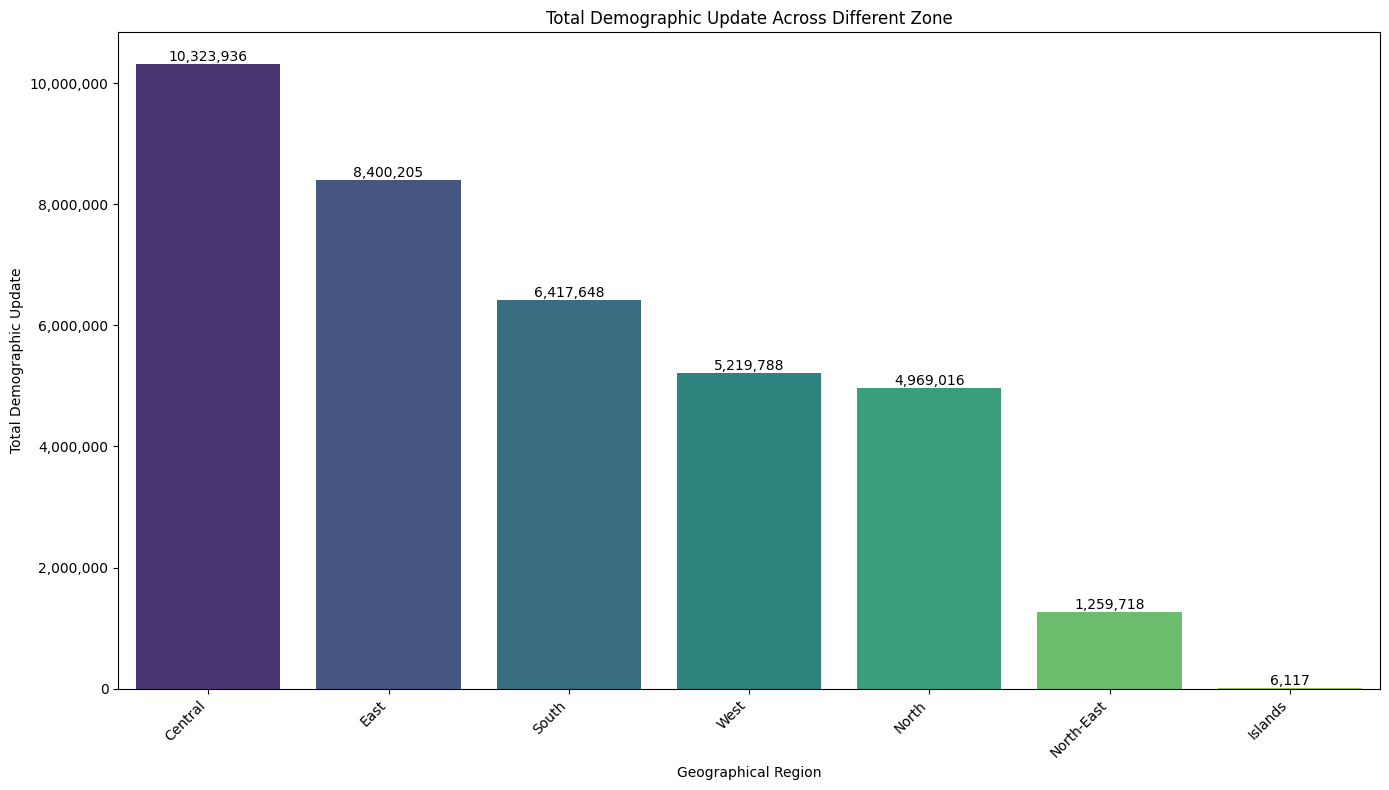

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


df['total_demographic_update'] = (
    df['demo_age_5_17'] + df['demo_age_17_']
).astype(int)

demographic_by_region = (
    df.groupby('geographical', as_index=False)['total_demographic_update']
      .sum()
      .sort_values(by='total_demographic_update', ascending=False)
)

plt.figure(figsize=(14, 8))

ax = sns.barplot(
    x='geographical',
    y='total_demographic_update',
    data=demographic_by_region,
    palette='viridis'
)

plt.title('Total Demographic Update Across Different Zone')
plt.xlabel('Geographical Region')
plt.ylabel('Total Demographic Update')
plt.xticks(rotation=45, ha='right')


ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))


for i, value in enumerate(demographic_by_region['total_demographic_update']):
    ax.text(
        i,
        value,
        f"{value:,}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


## 4.2 Stacked Bar Chart : Total Aadhaar Demographic Updates by Region and Age Group

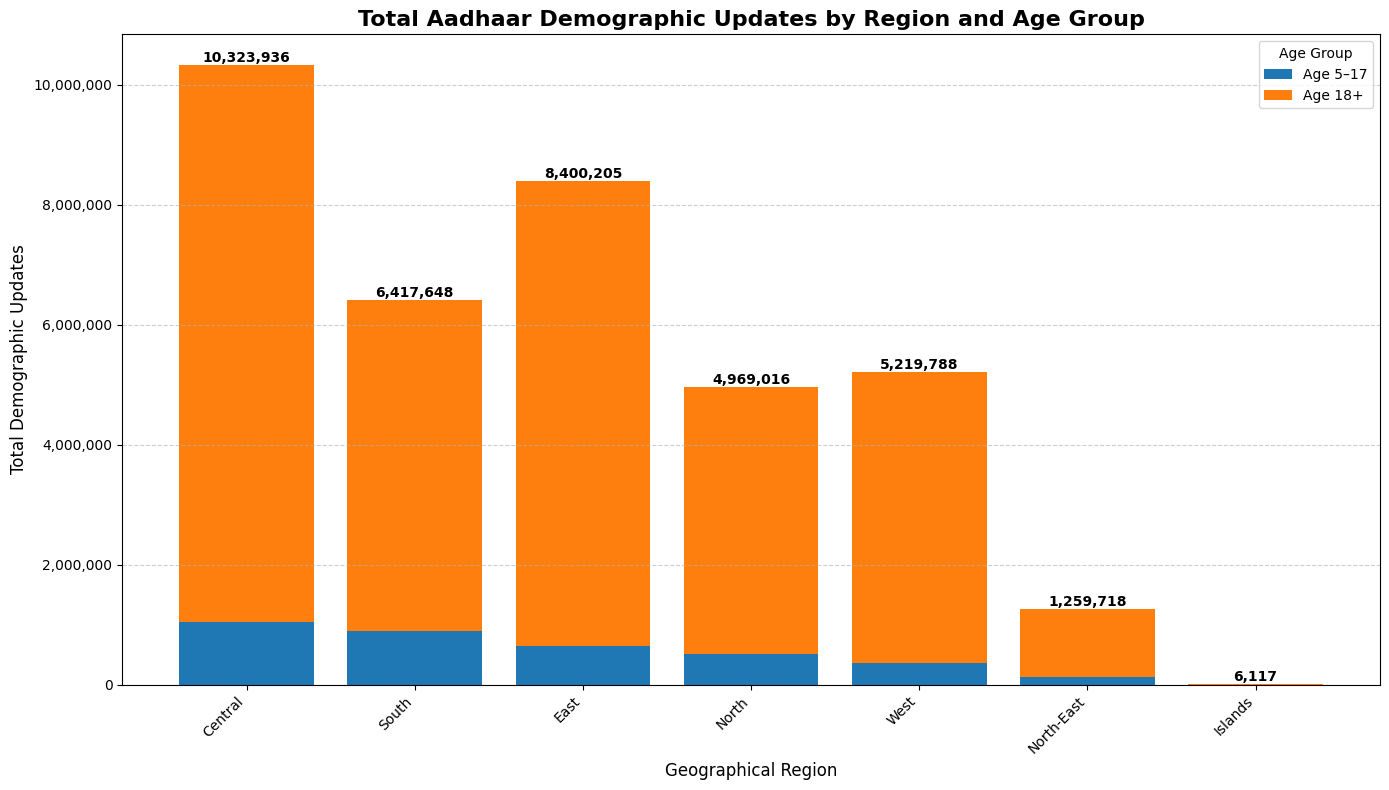

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


demo_region = (
    df.groupby('geographical')[['demo_age_5_17', 'demo_age_17_']]
      .sum()
      .sort_values(by=['demo_age_5_17', 'demo_age_17_'], ascending=False)
)


demo_region['total'] = demo_region['demo_age_5_17'] + demo_region['demo_age_17_']

plt.figure(figsize=(14, 8))


plt.bar(
    demo_region.index,
    demo_region['demo_age_5_17'],
    label='Age 5–17'
)

plt.bar(
    demo_region.index,
    demo_region['demo_age_17_'],
    bottom=demo_region['demo_age_5_17'],
    label='Age 18+'
)


for idx, total in enumerate(demo_region['total']):
    plt.text(
        idx,
        total,
        f"{total:,}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title(
    'Total Aadhaar Demographic Updates by Region and Age Group',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Geographical Region', fontsize=12)
plt.ylabel('Total Demographic Updates', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')


plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 4.3 Pie Chart : Total Demographic Update by Age Group (Pie Chart)

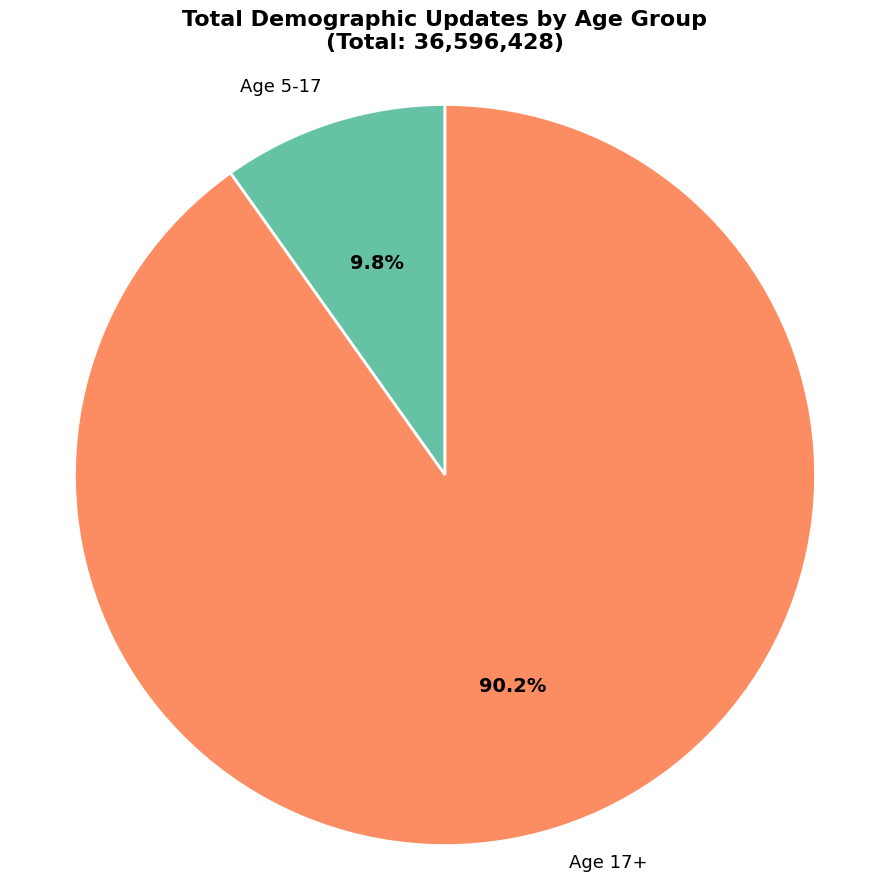

In [34]:
total_age_5_17 = df['demo_age_5_17'].sum()
total_age_17_ = df['demo_age_17_'].sum()

pie_data = pd.DataFrame({
    'Age Group': ['Age 5-17', 'Age 17+'],
    'Total Updates': [total_age_5_17, total_age_17_]
})

plt.figure(figsize=(9, 9))

total = pie_data['Total Updates'].sum()

wedges, texts, autotexts = plt.pie(
    pie_data['Total Updates'],
    labels=pie_data['Age Group'],
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    colors=sns.color_palette('Set2'),
    textprops={'fontsize': 13},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)


for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

plt.title(
    f'Total Demographic Updates by Age Group\n(Total: {total:,.0f})',
    fontsize=16,
    fontweight='bold',
    pad=15
)

plt.axis('equal')
plt.tight_layout()
plt.show()

## 4.4 Bar Chart : Total Demographic Updates Across States

/tmp/ipython-input-3365652750.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


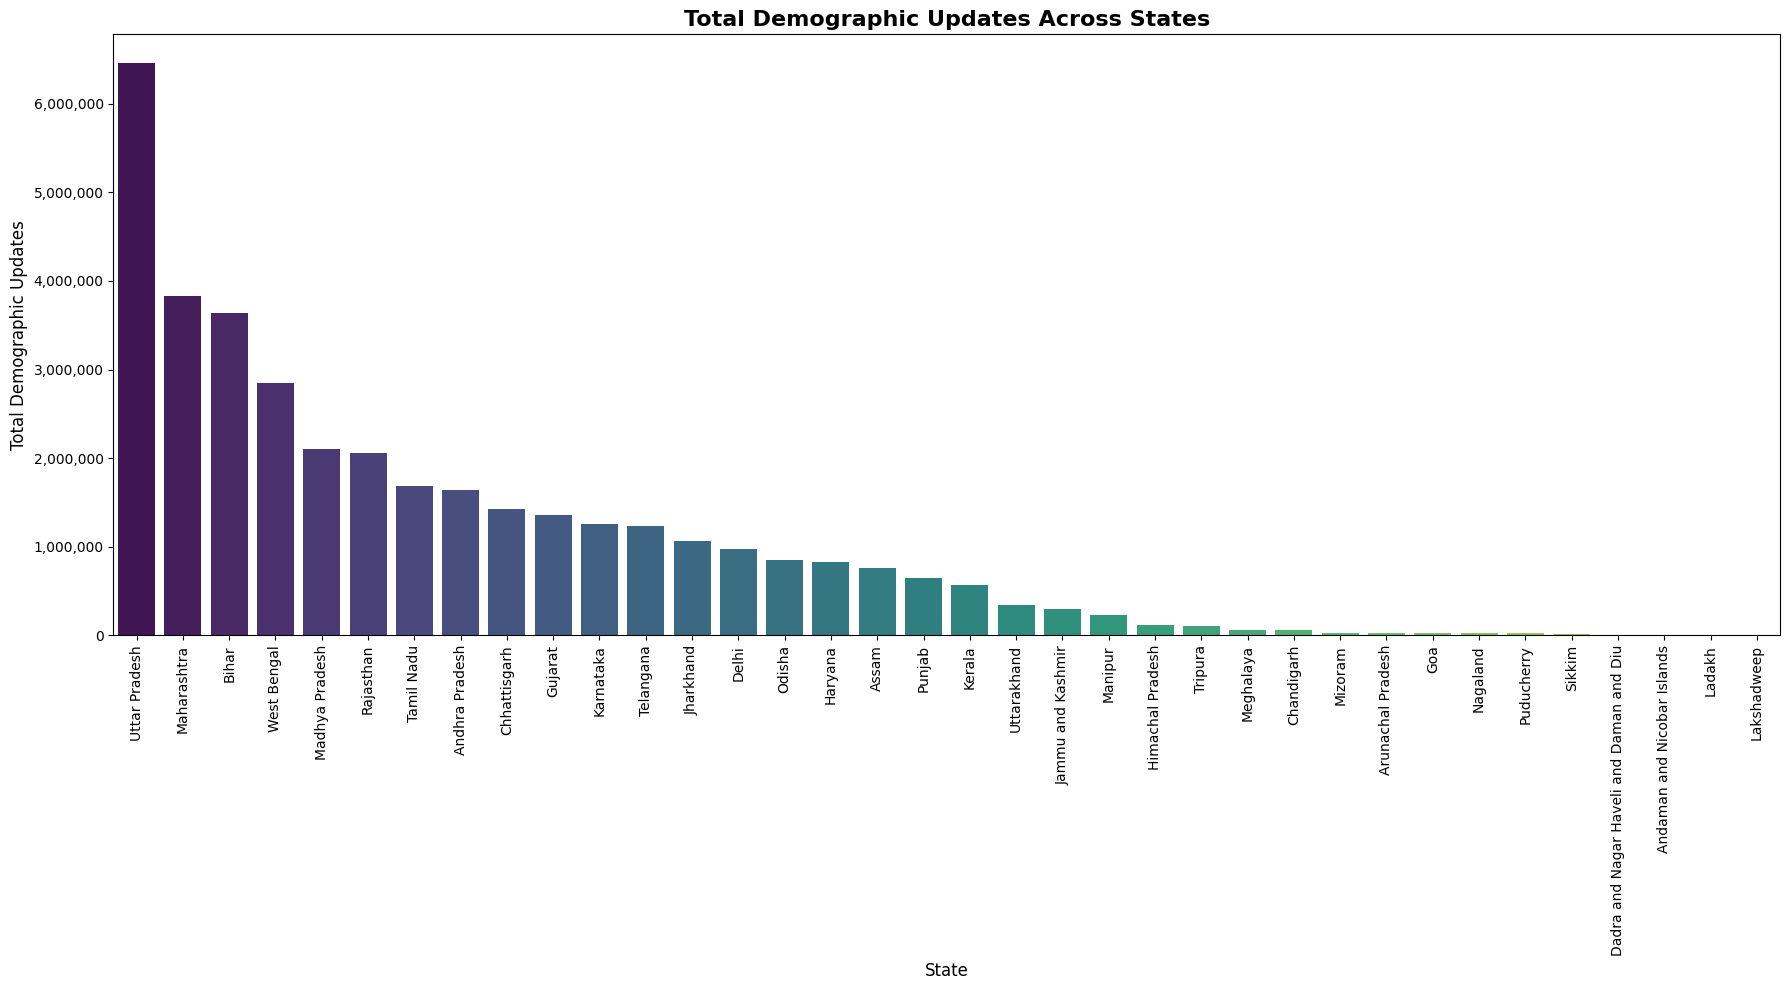

In [35]:
demographic_by_state = (
    df.groupby('state', as_index=False)['total_demographic_update']
      .sum()
      .astype({'total_demographic_update': 'int'})
      .sort_values(by='total_demographic_update', ascending=False)
)

plt.figure(figsize=(18, 10))

ax = sns.barplot(
    x='state',
    y='total_demographic_update',
    data=demographic_by_state,
    palette='viridis'
)

plt.title('Total Demographic Updates Across States', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Demographic Updates', fontsize=12)


plt.xticks(rotation=90)


ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


## 4.5 Bar Chart : Total Enrollment for Age Group 5–17 Across Geographical Regions

/tmp/ipython-input-3155539527.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


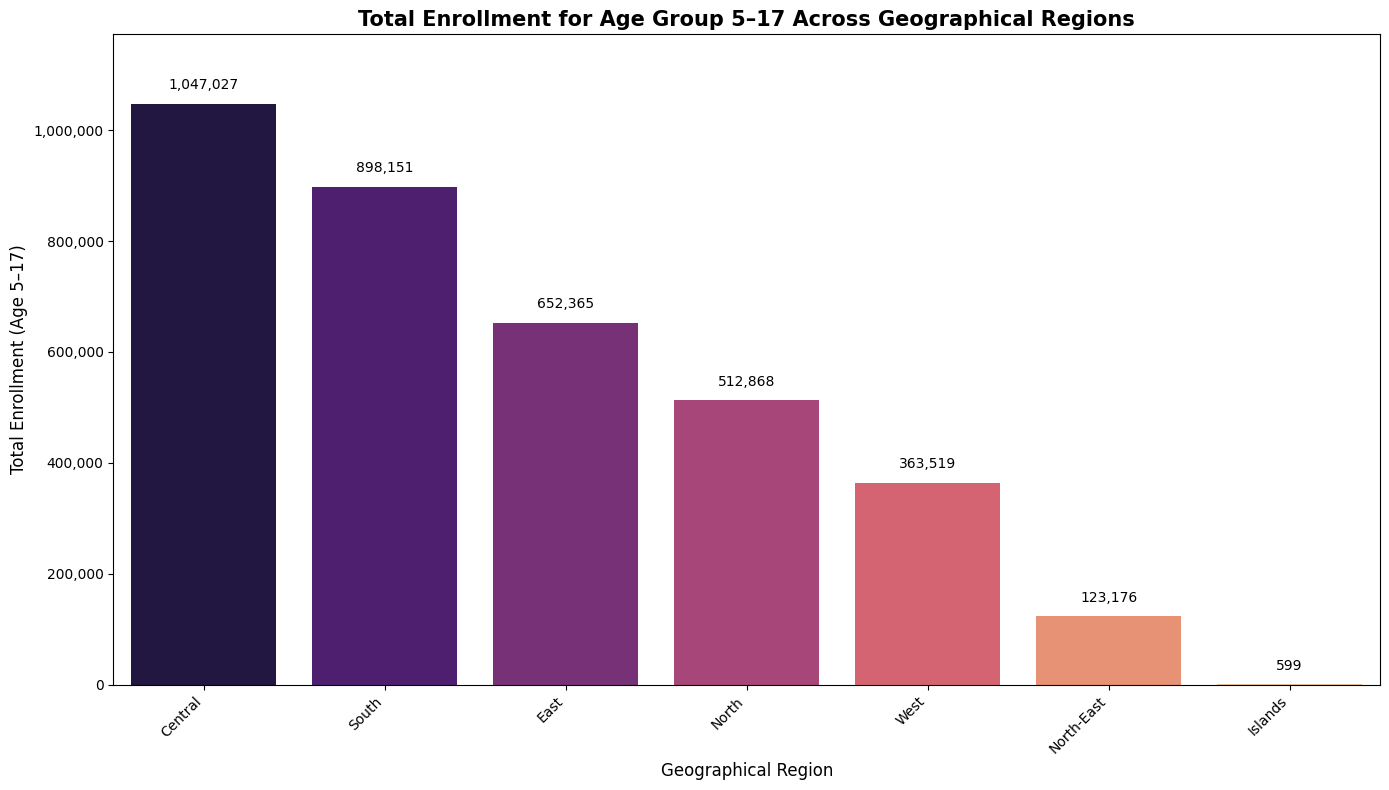

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


enrollment_5_17_by_region = (
    df.groupby('geographical', as_index=False)['demo_age_5_17']
      .sum()
      .astype({'demo_age_5_17': 'int'})
      .sort_values(by='demo_age_5_17', ascending=False)
)

plt.figure(figsize=(14, 8))

ax = sns.barplot(
    x='geographical',
    y='demo_age_5_17',
    data=enrollment_5_17_by_region,
    palette='magma'
)

plt.title(
    'Total Enrollment for Age Group 5–17 Across Geographical Regions',
    fontsize=15,
    fontweight='bold'
)
plt.xlabel('Geographical Region', fontsize=12)
plt.ylabel('Total Enrollment (Age 5–17)', fontsize=12)

plt.xticks(rotation=45, ha='right')


ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))


max_value = enrollment_5_17_by_region['demo_age_5_17'].max()
offset = max_value * 0.02


for i, value in enumerate(enrollment_5_17_by_region['demo_age_5_17']):
    ax.text(
        i,
        value + offset,
        f"{value:,}",
        ha='center',
        va='bottom',
        fontsize=10
    )


ax.set_ylim(0, max_value * 1.12)

plt.tight_layout()
plt.show()


## 4.6 Bar Chart : Total Enrollment for Age Group 17+ Across Geographical Regions

/tmp/ipython-input-2403816297.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


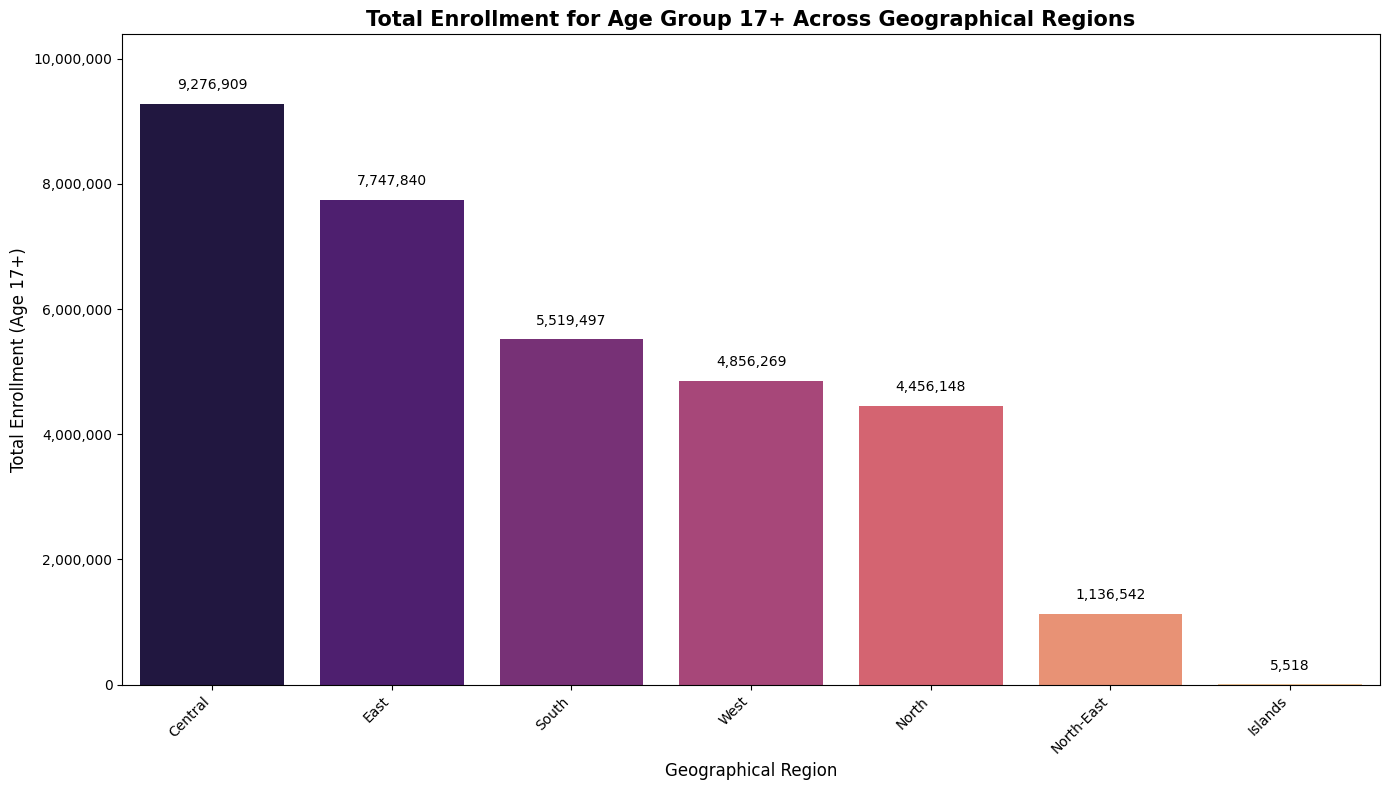

In [37]:

import matplotlib.ticker as mtick


enrollment_17_plus_by_region = (
    df.groupby('geographical', as_index=False)['demo_age_17_']
      .sum()
      .astype({'demo_age_17_': 'int'})
      .sort_values(by='demo_age_17_', ascending=False)
)

plt.figure(figsize=(14, 8))

ax = sns.barplot(
    x='geographical',
    y='demo_age_17_',
    data=enrollment_17_plus_by_region,
    palette='magma'
)

plt.title(
    'Total Enrollment for Age Group 17+ Across Geographical Regions',
    fontsize=15,
    fontweight='bold'
)
plt.xlabel('Geographical Region', fontsize=12)
plt.ylabel('Total Enrollment (Age 17+)', fontsize=12)

plt.xticks(rotation=45, ha='right')


ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))


max_value = enrollment_17_plus_by_region['demo_age_17_'].max()
offset = max_value * 0.02


for i, value in enumerate(enrollment_17_plus_by_region['demo_age_17_']):
    ax.text(
        i,
        value + offset,
        f"{value:,}",
        ha='center',
        va='bottom',
        fontsize=10
    )


ax.set_ylim(0, max_value * 1.12)

plt.tight_layout()
plt.show()


## 4.7 Stacked Bar Chart : Stacked Demographic Update by Age Group and Geographical Region

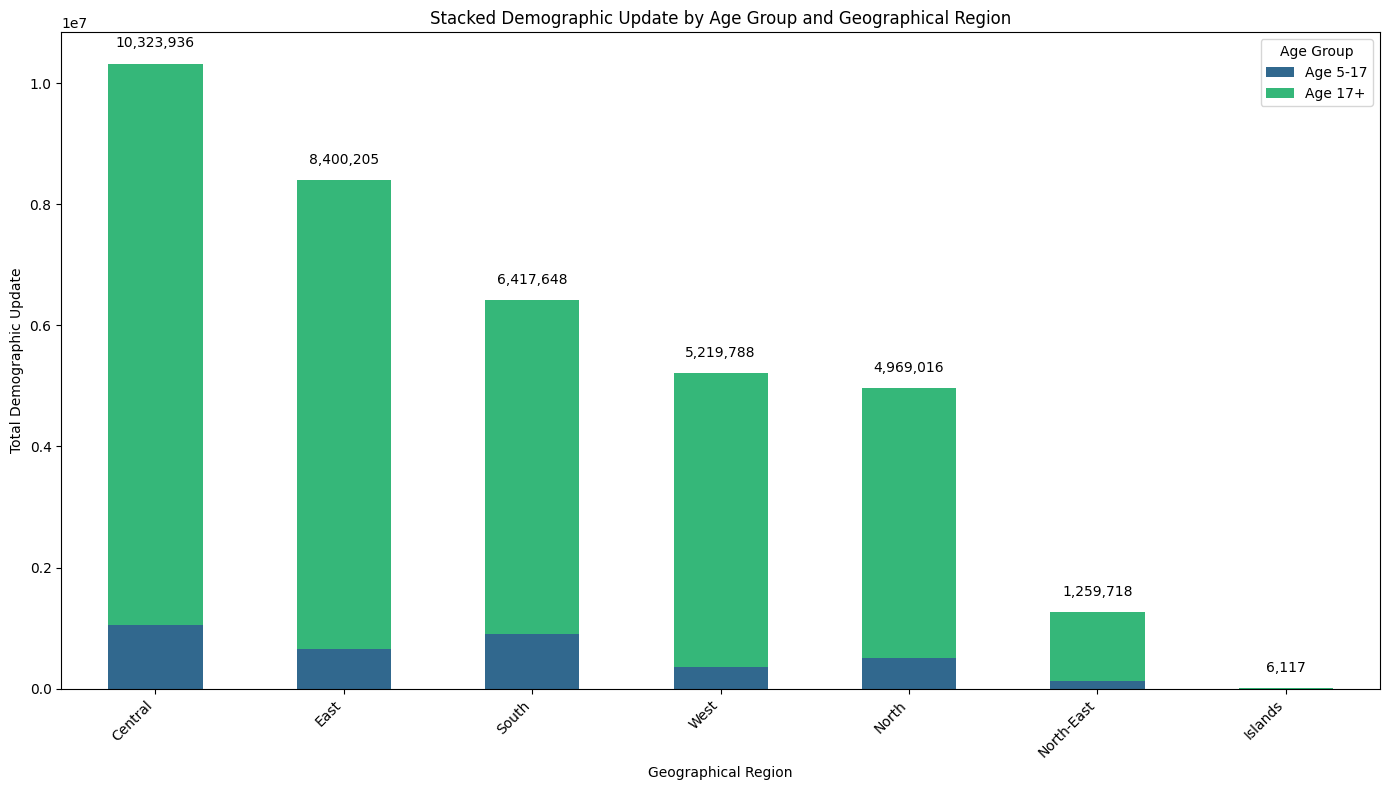

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


stacked_data = df.groupby('geographical')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()


stacked_data['total_demographic'] = stacked_data['demo_age_5_17'] + stacked_data['demo_age_17_']


stacked_data = stacked_data.sort_values(by='total_demographic', ascending=False)


stacked_data_plot = stacked_data.set_index('geographical')[['demo_age_5_17', 'demo_age_17_']]


colors = sns.color_palette('viridis', n_colors=2)


plt.figure(figsize=(14, 8))
ax = stacked_data_plot.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())

plt.title('Stacked Demographic Update by Age Group and Geographical Region')
plt.xlabel('Geographical Region')
plt.ylabel('Total Demographic Update')
plt.xticks(rotation=45, ha='right')
plt.legend(['Age 5-17', 'Age 17+'], title='Age Group')


max_y_value = ax.get_ylim()[1]
offset = max_y_value * 0.02

for i, total_val in enumerate(stacked_data['total_demographic']):
    ax.text(
        i,
        total_val + offset,
        f'{total_val:,}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10
    )

plt.tight_layout()
plt.show()

## 4.8 Pie Chart : Proportion of Demographic Updates\n(Age Group 5–17) by Geographical Region (Excluding Islands)

In [39]:
enrollment_5_17_by_region = (
    df.groupby('geographical', as_index=False)['demo_age_5_17']
      .sum()
      .astype({'demo_age_5_17': 'int'})
      .sort_values(by='demo_age_5_17', ascending=False)
)

print("Enrollment for Age Group 5-17 by Geographical Region:")
display(enrollment_5_17_by_region)

Enrollment for Age Group 5-17 by Geographical Region:


,geographical,demo_age_5_17
0,Central,1047027
5,South,898151
1,East,652365
3,North,512868
6,West,363519
4,North-East,123176
2,Islands,599


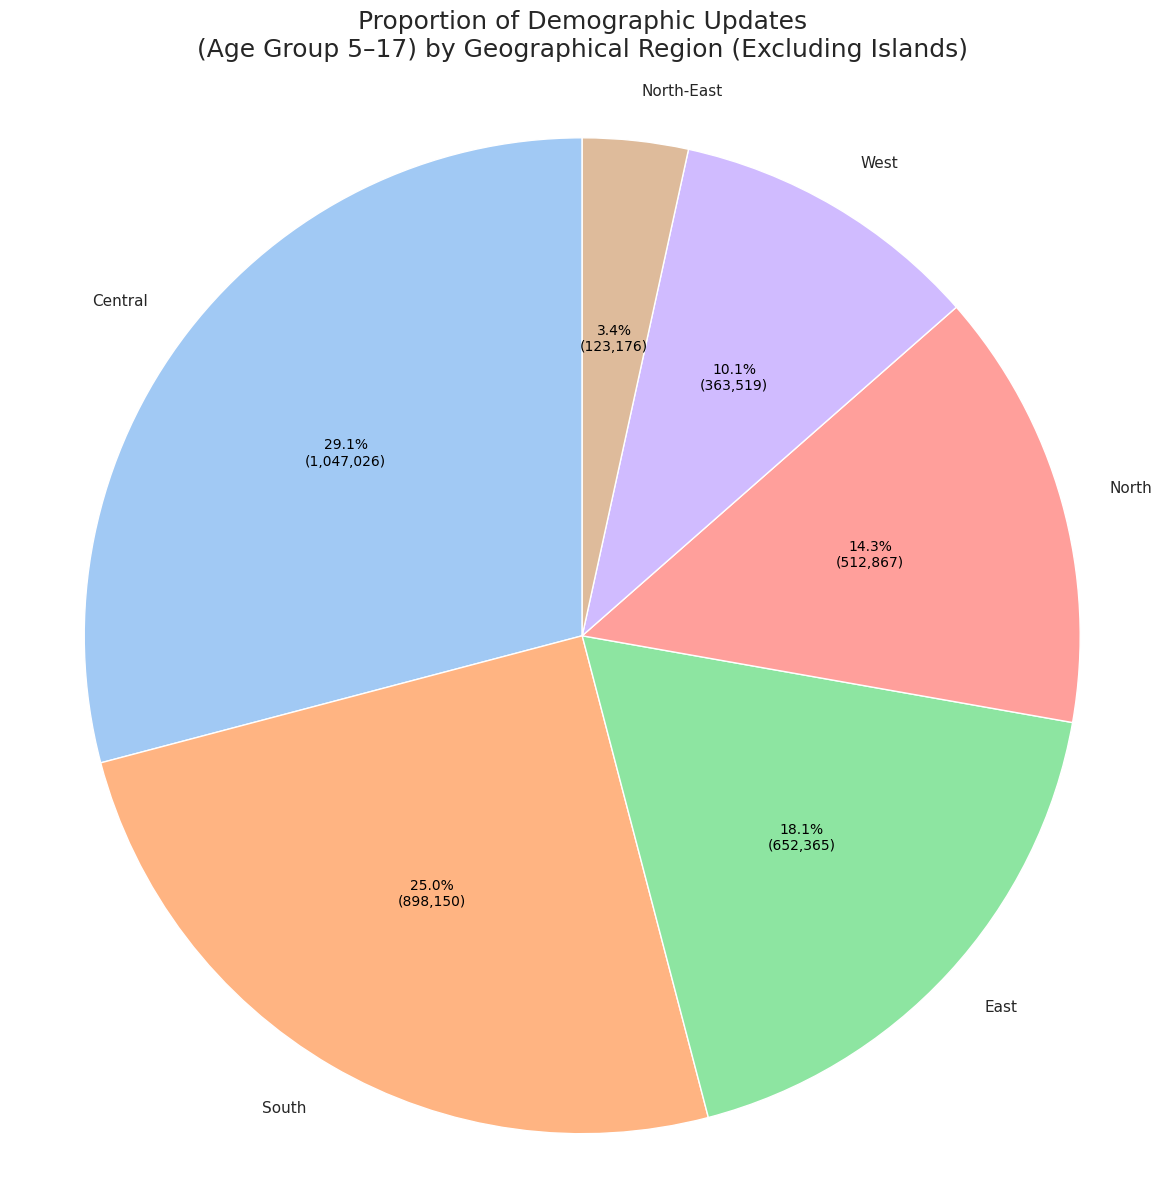

In [40]:
sns.set_style("white")

plt.figure(figsize=(12, 12))


filtered_enrollment = enrollment_5_17_by_region[enrollment_5_17_by_region['geographical'] != 'Islands']


values = filtered_enrollment['demo_age_5_17']
labels = filtered_enrollment['geographical']
total = values.sum()


colors = sns.color_palette("pastel", len(values))


def autopct_format(pct):
    absolute = int(pct * total / 100)
    return f"{pct:.1f}%\n({absolute:,})"


wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    autopct=autopct_format,
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 11}
)


for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)


plt.title(
    'Proportion of Demographic Updates\n(Age Group 5–17) by Geographical Region (Excluding Islands)',
    fontsize=18,
    pad=25
)


plt.axis('equal')

plt.tight_layout()
plt.show()

## 4.9 Pie Chart:  Age Group 17+ by Geographical Region (Excluding Islands)

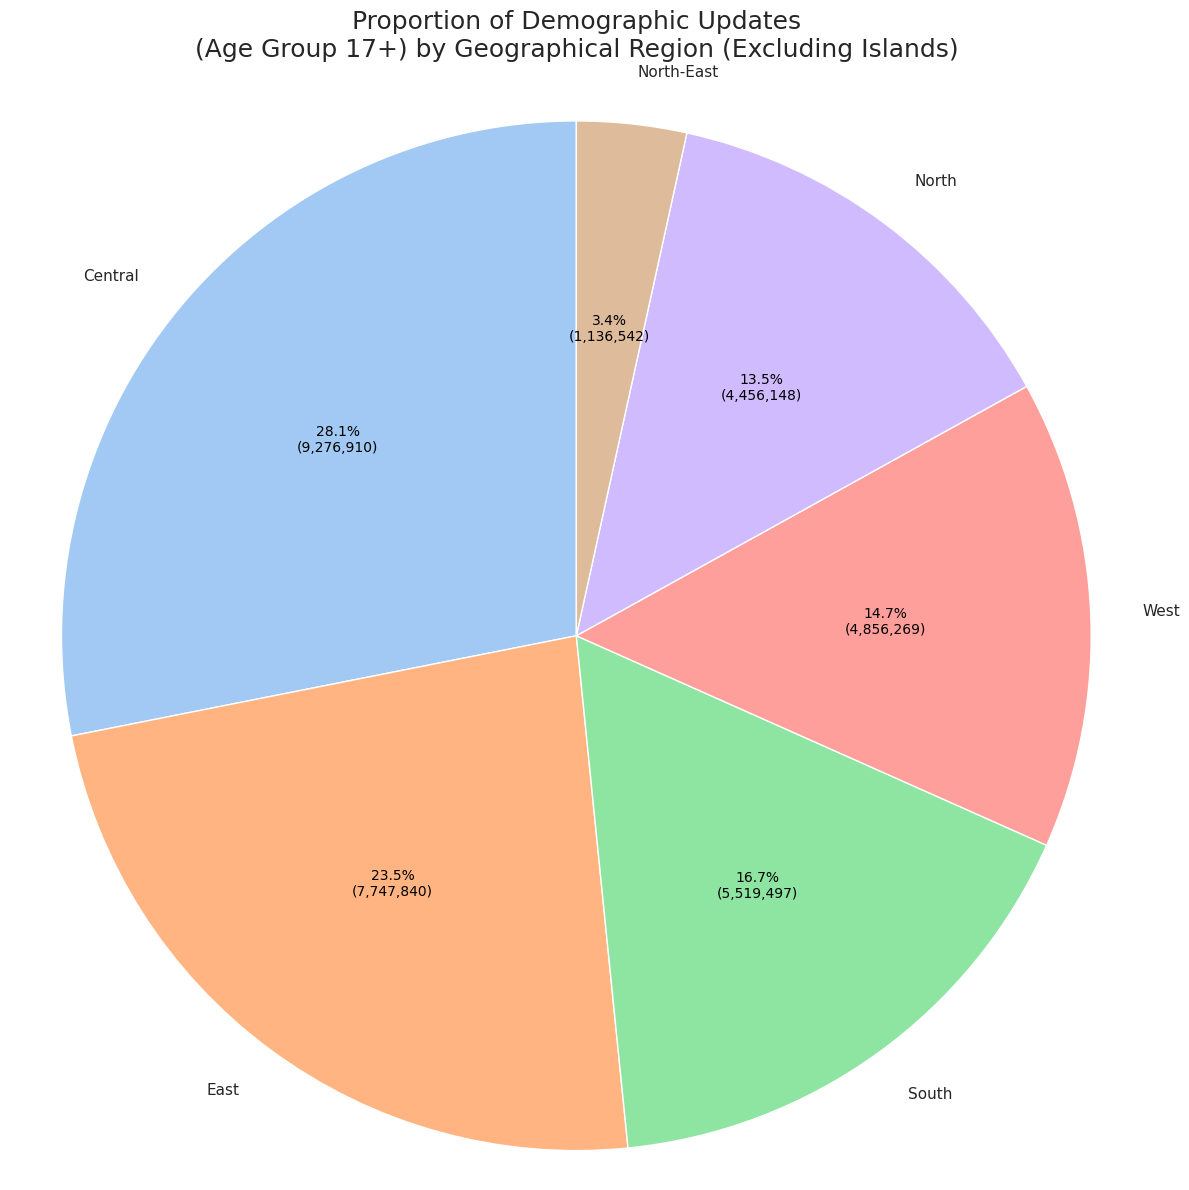

In [41]:

sns.set_style("white")

plt.figure(figsize=(12, 12))


filtered_enrollment_17_plus = enrollment_17_plus_by_region[enrollment_17_plus_by_region['geographical'] != 'Islands']


values = filtered_enrollment_17_plus['demo_age_17_']
labels = filtered_enrollment_17_plus['geographical']
total = values.sum()


colors = sns.color_palette("pastel", len(values))


def autopct_format(pct):
    absolute = int(pct * total / 100)
    return f"{pct:.1f}%\n({absolute:,})"


wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    autopct=autopct_format,
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 11}
)


for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)


plt.title(
    'Proportion of Demographic Updates\n(Age Group 17+) by Geographical Region (Excluding Islands)',
    fontsize=18,
    pad=25
)


plt.axis('equal')

plt.tight_layout()
plt.show()

## 4.10 Line Chart : Monthly Trend of Total Demographic Updates

In [42]:
enrollment_17_plus_by_region = (
    df.groupby('geographical', as_index=False)['demo_age_17_']
      .sum()
      .astype({'demo_age_17_': 'int'})
      .sort_values(by='demo_age_17_', ascending=False)
)

print("Enrollment for Age Group 17+ by Geographical Region:")
display(enrollment_17_plus_by_region)

Enrollment for Age Group 17+ by Geographical Region:


,geographical,demo_age_17_
0,Central,9276909
1,East,7747840
5,South,5519497
6,West,4856269
3,North,4456148
4,North-East,1136542
2,Islands,5518


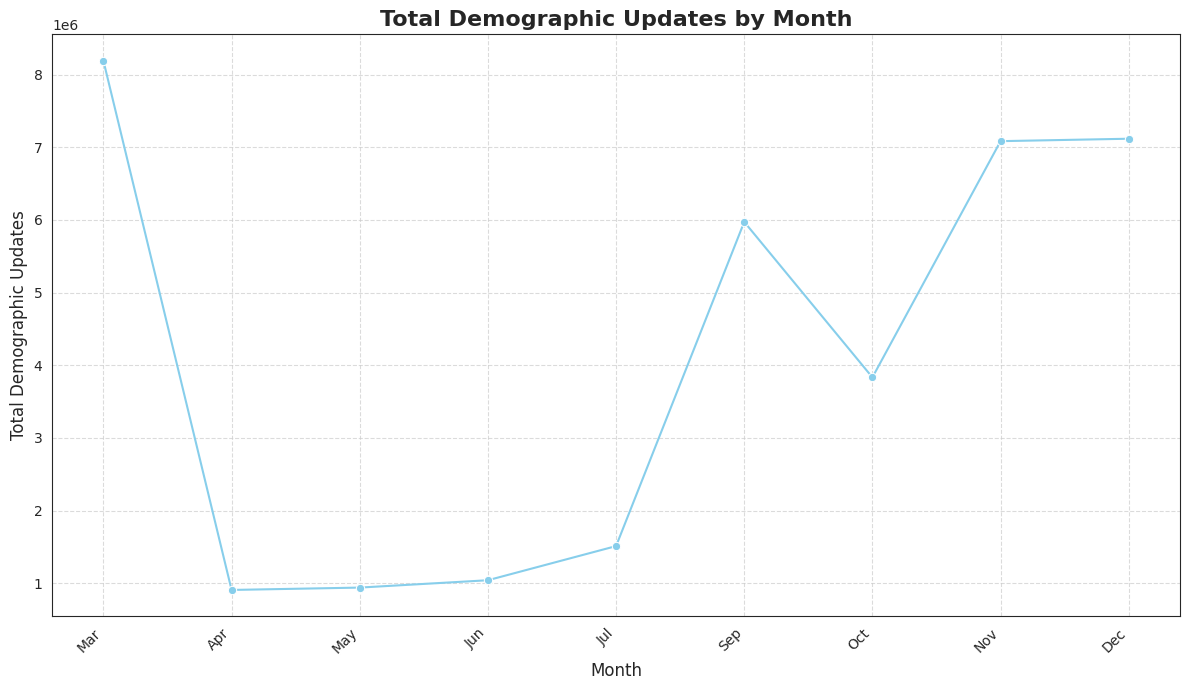

In [43]:

monthly_demographic_update = df.groupby('month')['total_demographic_update'].sum().reset_index()


month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_demographic_update['month_name'] = monthly_demographic_update['month'].map(month_names)


monthly_demographic_update = monthly_demographic_update.sort_values(by='month')

plt.figure(figsize=(12, 7))
sns.lineplot(x='month_name', y='total_demographic_update', data=monthly_demographic_update, marker='o', color='skyblue')
plt.title('Total Demographic Updates by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Demographic Updates', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4.11 Line Chart :Monthly Trend of Demographic Updates for Both Age Groups

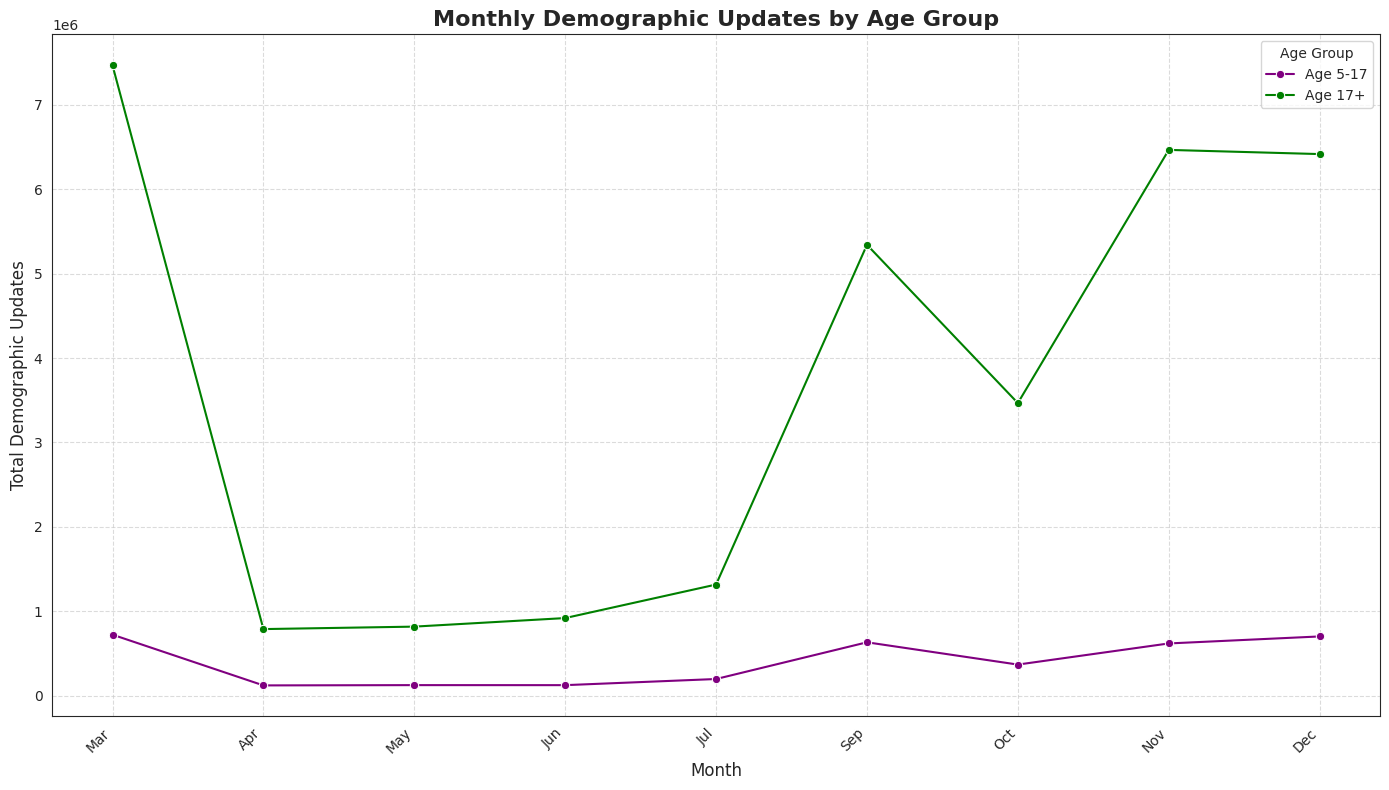

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


monthly_demographic_combined = df.groupby('month')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()


month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_demographic_combined['month_name'] = monthly_demographic_combined['month'].map(month_names)


monthly_demographic_combined = monthly_demographic_combined.sort_values(by='month')

plt.figure(figsize=(14, 8))
sns.lineplot(x='month_name', y='demo_age_5_17', data=monthly_demographic_combined, marker='o', label='Age 5-17', color='purple')
sns.lineplot(x='month_name', y='demo_age_17_', data=monthly_demographic_combined, marker='o', label='Age 17+', color='green')

plt.title('Monthly Demographic Updates by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Demographic Updates', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

## 4.12 Line Chart : Monthly Aadhaar Demographic Updates by Age Group

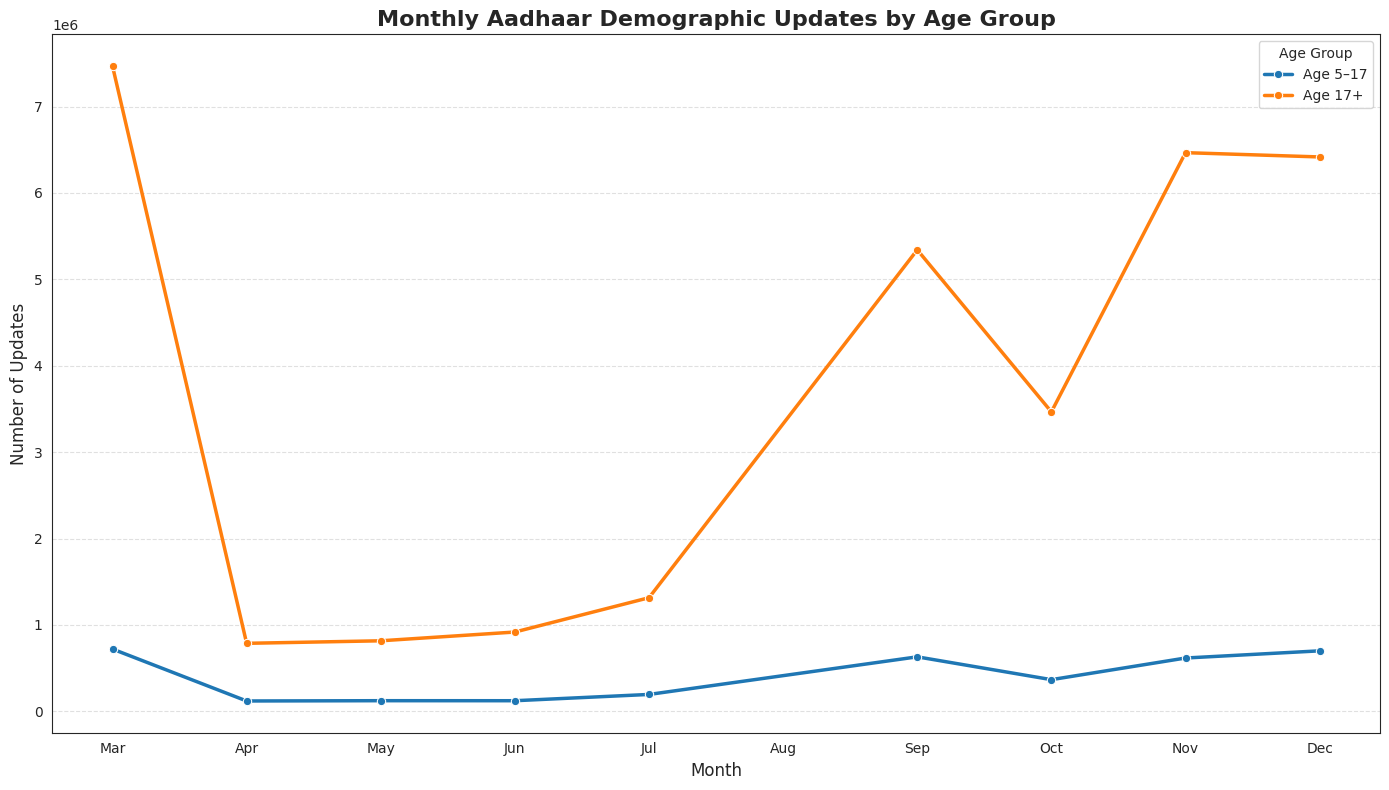

In [45]:

monthly_demographic_combined = (
    df.groupby('month')[['demo_age_5_17', 'demo_age_17_']]
      .sum()
      .reset_index()
)


month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_names = dict(zip(range(1,13), month_order))

monthly_demographic_combined['month_name'] = monthly_demographic_combined['month'].map(month_names)


monthly_demographic_combined['month_name'] = pd.Categorical(
    monthly_demographic_combined['month_name'],
    categories=month_order,
    ordered=True
)

monthly_demographic_combined = monthly_demographic_combined.sort_values('month')

plt.figure(figsize=(14, 8))

sns.lineplot(
    x='month_name',
    y='demo_age_5_17',
    data=monthly_demographic_combined,
    marker='o',
    linewidth=2.5,
    label='Age 5–17'
)

sns.lineplot(
    x='month_name',
    y='demo_age_17_',
    data=monthly_demographic_combined,
    marker='o',
    linewidth=2.5,
    label='Age 17+'
)

plt.title('Monthly Aadhaar Demographic Updates by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Updates', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


## 4.13 HeatMap : Heatmap of Monthly Aadhaar Demographic Updates by Zone Wise

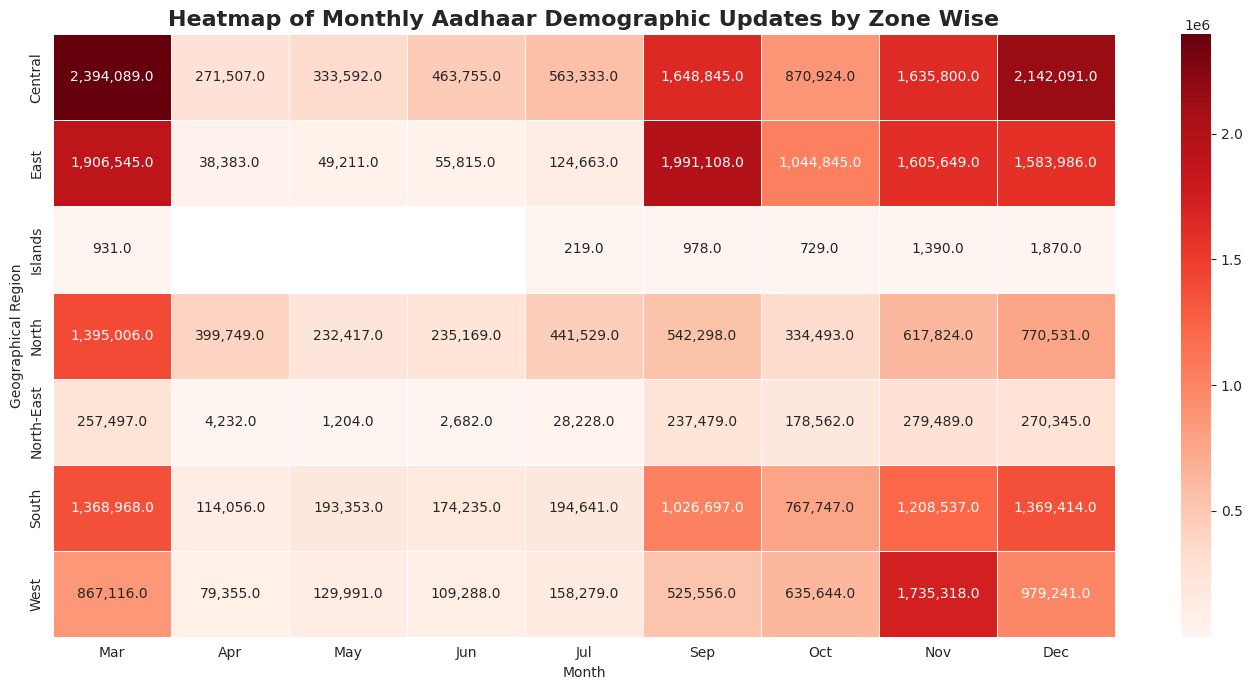

In [47]:
df['total_demo_update'] = df['demo_age_5_17'] + df['demo_age_17_']


heatmap_data = (
    df.groupby(['geographical', 'month'])['total_demo_update']
      .sum()
      .reset_index()
)


heatmap_pivot = heatmap_data.pivot(
    index='geographical',
    columns='month',
    values='total_demo_update'
)


month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
heatmap_pivot.columns = [month_names[m] for m in heatmap_pivot.columns]


plt.figure(figsize=(14, 7))
sns.heatmap(
    heatmap_pivot,
    cmap='Reds',
    linewidths=0.5,
    annot=True,
    fmt=','
)

plt.title('Heatmap of Monthly Aadhaar Demographic Updates by Zone Wise',
          fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Geographical Region')
plt.tight_layout()
plt.show()

## 4.14 Line Chart: Daily Trend of Demographic Updates for Age Group 5-17 and 17+ in September

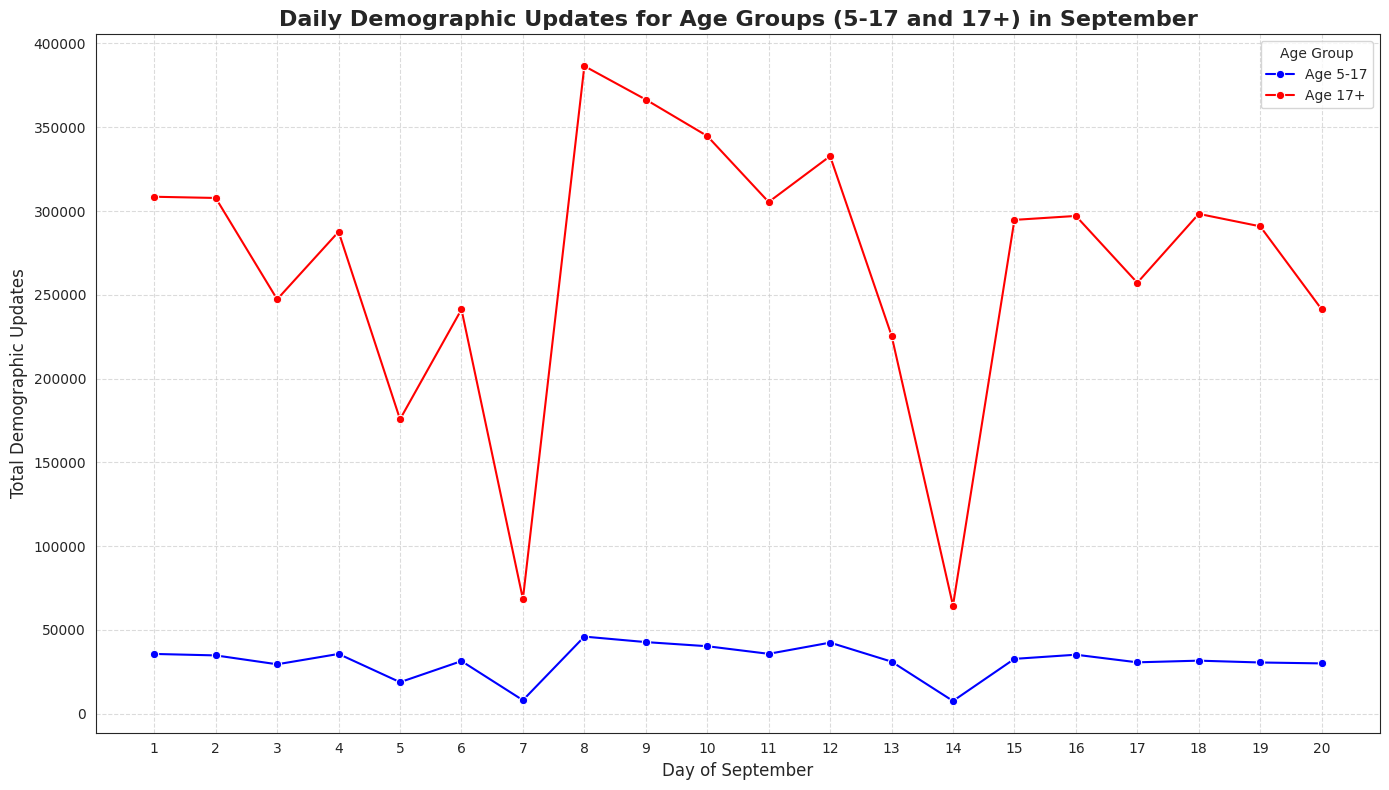

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


september_data = df[df['month'] == 9].copy()


daily_september_demographic = september_data.groupby('day')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='day', y='demo_age_5_17', data=daily_september_demographic, marker='o', label='Age 5-17', color='blue')
sns.lineplot(x='day', y='demo_age_17_', data=daily_september_demographic, marker='o', label='Age 17+', color='red')

plt.title('Daily Demographic Updates for Age Groups (5-17 and 17+) in September', fontsize=16, fontweight='bold')
plt.xlabel('Day of September', fontsize=12)
plt.ylabel('Total Demographic Updates', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(daily_september_demographic['day'].unique())
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()